## Pt 1. Data Analysis 

I implemented code to analyze the Iris data sets by feature and plant species (class)

(a) I performed statistics of each feature and class using the test statistics listed in Table 1. <br>
    
    It includes the following: <br>
    min_value, max_value, mean_value, trimmed_mean, alpha_trimmed_mean, standard_deviation, skewness, kurtosis

(b) Then I performed analysis and provide an explanation of what each of the statistics provides of the data. 

In [1]:
from sklearn import datasets
import numpy as np
import pandas as pd

# Load Iris dataset
iris = datasets.load_iris()

# Features (X) are in iris.data
X = iris.data

# Labels (y) are in iris.target
y = iris.target

# Create a DataFrame for easier manipulation
df = pd.DataFrame(X, columns=['sepal_length', 'sepal_width', 'petal_length', 'petal_width'])
df['class'] = y

# Preview of DataFrame: 0 -> Setosa, 1 -> Versicolor, 2 -> Virginica
print(df)


     sepal_length  sepal_width  petal_length  petal_width  class
0             5.1          3.5           1.4          0.2      0
1             4.9          3.0           1.4          0.2      0
2             4.7          3.2           1.3          0.2      0
3             4.6          3.1           1.5          0.2      0
4             5.0          3.6           1.4          0.2      0
..            ...          ...           ...          ...    ...
145           6.7          3.0           5.2          2.3      2
146           6.3          2.5           5.0          1.9      2
147           6.5          3.0           5.2          2.0      2
148           6.2          3.4           5.4          2.3      2
149           5.9          3.0           5.1          1.8      2

[150 rows x 5 columns]


In [2]:
# Define the statistical functions
def min_value(x):
    return np.min(x)

def max_value(x):
    return np.max(x)

def mean_value(x):
    return np.mean(x)

def trimmed_mean(x, p):
    n = len(x)
    sorted_x = np.sort(x)
    return np.mean(sorted_x[p:-p])

def alpha_trimmed_mean(x, alpha):
    n = len(x)
    p = int(n * alpha)
    sorted_x = np.sort(x)
    return np.mean(sorted_x[p:-p])

def standard_deviation(x):
    return np.std(x)

def skewness(x):
    n = len(x)
    mu = np.mean(x)
    sigma = np.std(x)
    return np.mean((x - mu)**3) / (sigma**3)


def kurtosis(x):
    n = len(x)
    mu = np.mean(x)
    sigma = np.std(x)
    return np.mean((x - mu)**4) / (sigma**4) - 3

In [3]:
# Initialize a dictionary to store the results
results = {}

# Iterate over features and classes
for feature in df.columns[:-1]:  # Exclude 'class' column
    
    # keys are feature names (sepal_length, sepal_width, petal_length, petal_width) & the values are dictionaries
    results[feature] = {}
    
    # Iterates over unique class labels in the 'class' column of the DataFrame
    for class_label in df['class'].unique():
        # Extracts the data for the current combination of feature and class
        data = df[df['class'] == class_label][feature]
        
        # Calculates various statistics for the current combination of feature and class 
        # (key -> stat names, values -> calcuated val)
        results[feature][f'class_{class_label}'] = {
            'Minimum': min_value(data),
            'Maximum': max_value(data),
            'Mean': mean_value(data),
            'Trimmed Mean (p=10%)': trimmed_mean(data, p=int(len(data)*0.1)),
            'Alpha-Trimmed Mean (alpha=10%)': alpha_trimmed_mean(data, alpha=0.1),
            'Standard Deviation': standard_deviation(data),
            'Skewness': skewness(data),
            'Kurtosis': kurtosis(data)
        }



In [4]:
# Creates new dictionary where the keys are tuples (i, j) (feature, class) + the values are the corresponding nested dictionaries with the statistics
results_dictionary = {(i,j): results[i][j] 
                           for i in results.keys()
                           for j in results[i].keys()}

# Convert the results to a pandas DataFrame for easy viewing
results_df = pd.DataFrame.from_dict(results_dictionary, orient='index')

# Apply the class_labels_to_species mapping to the DataFrame index 

class_labels_to_species = {
    'class_0': 'Setosa',
    'class_1': 'Versicolor',
    'class_2': 'Virginica'
}

results_df.index = [(i, class_labels_to_species[j]) for i, j in results_df.index]

# Print the results
print(results_df)


                            Minimum  Maximum   Mean  Trimmed Mean (p=10%)  \
(sepal_length, Setosa)          4.3      5.8  5.006                5.0025   
(sepal_length, Versicolor)      4.9      7.0  5.936                5.9375   
(sepal_length, Virginica)       4.9      7.9  6.588                6.5725   
(sepal_width, Setosa)           2.3      4.4  3.428                3.4150   
(sepal_width, Versicolor)       2.0      3.4  2.770                2.7800   
(sepal_width, Virginica)        2.2      3.8  2.974                2.9625   
(petal_length, Setosa)          1.0      1.9  1.462                1.4600   
(petal_length, Versicolor)      3.0      5.1  4.260                4.2925   
(petal_length, Virginica)       4.5      6.9  5.552                5.5100   
(petal_width, Setosa)           0.1      0.6  0.246                0.2375   
(petal_width, Versicolor)       1.0      1.8  1.326                1.3250   
(petal_width, Virginica)        1.4      2.5  2.026                2.0325   

Based on the above table of statistics, I made the following observations and conclusions:

**Minimum, Maximum, and Mean**:
These statistics provide basic information about the range and central tendency of each feature within each class.
For example, in the case of sepal length for Setosa, the minimum is 4.3, the maximum is 5.8, and the mean is 5.006. This tells us that the Setosa sepal lengths range from 4.3 to 5.8 with an average of 5.006.

**Trimmed Mean (p=10%):**
This statistic gives an estimate of the central tendency of the data after removing the lowest and highest 10% of the observations.
For example, in the case of sepal length for Setosa, the trimmed mean is 5.0025, which is very close to the actual mean. This suggests that there are no extreme outliers in the data. Similar trends are shown across different spcies for each features.

**Alpha-Trimmed Mean (alpha=10%):**
Similar to the trimmed mean, this statistic estimates the central tendency after removing a percentage of observations from both ends.
The results are similar if not the same to the trimmed means, indicating that the data doesn't have significant outliers. 

**Standard Deviation:**
This measures the spread or dispersion of the data around the mean. A lower standard deviation means that the data points tend to be close to the mean, while a higher standard deviation means that the data points are spread out over a wider range.
For instance, in the case of sepal length for Setosa, the standard deviation is 0.348947. This suggests that the sepal lengths of Setosa flowers are relatively tightly clustered around the mean of 5.006. This means that most of the sepal lengths in the Setosa species fall within a relatively narrow range, indicating a certain level of uniformity or consistency in this characteristic within the Setosa species.

**Skewness:**
Skewness measures the asymmetry of the distribution. A positive skewness indicates a longer tail on the right side. When a distribution is positively skewed, it means that the right tail of the distribution is longer or fatter than the left tail. In other words, the mass of the distribution is concentrated on the left side. For example, the skewness of sepal width for Virginica is 0.354878. This means the distribution may be slightly skewed to the right. This suggests that, in general, most of the sepal width values are concentrated on the higher end of the scale, but there are still some observations with lower sepal width values that are pulling the distribution towards the right.

**Kurtosis:**
Kurtosis measures the "tailedness" of the data. Positive kurtosis indicates heavy tails, while negative kurtosis indicates light tails. For instance, the kurtosis of petal width for Setosa is 1.434317. This suggests that the distribution has relatively heavy tails.

Overall, based on these statistics, we can conclude that the Iris dataset doesn't seem to have any extreme outliers or significant deviations from normality. The data appears to be relatively well-behaved and evenly distributed within each class. This makes it a good dataset for various types of analysis and modeling.

## Pt 2. Data Processing


(a) I Implemented an algorithm to visually see two sets of features and the class they belong to using seaborn library

(b) Sorting 

    i. Developed an algorithm (pseudocode) to sort the four features in the dataset.
    ii. Provided the running time and total running time of your algorithm in O-notation and
    T(n).
    iii. Implemented my algorithm in a format of class
    
    The use of a built in function or the use of the Python code provided.
    iv. Determined if any of the four features can separate the three plant species.
    v. Provided an explanation of the results:

        A. Was there any feature that could separate the plant species; if so why, if not why
        not?
        B. What was the metric used to determine separation? Explain why the metric was
        chosen.

(c) Data Normalization

    i. Implemented an algorithm to normalize the Iris data by feature. Verify my results by
    ensuring each feature has a range from 0 to 1.

(d) Outlier Removal 

    i. Designed an algorithm (pseudocode) to remove in sequential order observations that are
    furthest from the data class mean by class (species).
    ii. Provided the running time and total running time of your algorithm in O-notation and
    T(n). Stateed any assumptions you made in your breakdown.
    iii. Implemented my design, in a format of class
    iv. Determined if the data contains an outlier by plotting each class individually, the key
    is to plot two features at a time n different combinations, e.g., feature 1 vs feature 2,
    feature 1 vs feature 3, etc.
    v. Provided an explanation of the results:
        A. Was there any class that had obvious outliers; if so how did you determine the
        outlier, if not, why not?
        B. What was the metric used to determine the outlier? Explain why the metric was
        chosen.

(e) Feature Ranking 

    i. Designed an algorithm (pseudocode) to rank the four features in the Iris dataset.
    ii. Provided the running time and total running time of my algorithm in O-notation and
    T(n). 
    iii. Implemented my design, in a format of class
    iv. Determined if any of the four features can separate the three plant types.
    v. Provided an explanation of the results:
        A. Was there any feature that could separate the data by plant species; if so why, if
        not why not?
        B. If a feature could not separate the plant types; what conclusion can drawn from
        this feature? 3
        C. Can a metric be developed to complement the ranking method? Explain why or
        why not.

(f) Principal Component Analysis (PCA)

    i. Used the built-in PCA to perform analysis of the Iris data set using all species (classes).
    ii. Used the built-in PCA to perform analysis of the Iris data set by specie (class).
    iii. Provided an explanation of the results:
        A. What is the difference between using all the data and using the data by specie
        (class)?
        B. what is the percentage explained for each principal component?
        C. how many principal components should you keep?

### A

In [7]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

# Load the Iris dataset
df = pd.read_csv('iris.csv')

df.head(10)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
5,5.4,3.9,1.7,0.4,setosa
6,4.6,3.4,1.4,0.3,setosa
7,5.0,3.4,1.5,0.2,setosa
8,4.4,2.9,1.4,0.2,setosa
9,4.9,3.1,1.5,0.1,setosa


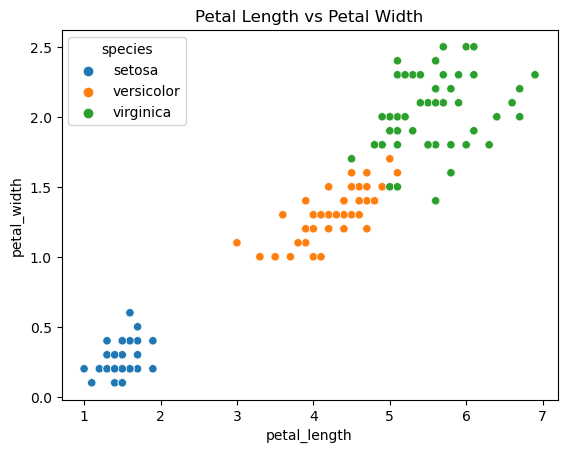

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter('ignore', category=FutureWarning)

def visualize_features(feature1, feature2, class_labels, data, title):
    """
    Visualize two features and their corresponding class labels.

    Args:
        feature1 (str): Name of the first feature (x-axis).
        feature2 (str): Name of the second feature (y-axis).
        class_labels (str): Name of the column containing class labels.
        data (pd.DataFrame): DataFrame containing the data.
        title (str): Title of the plot.

    Returns:
        None
    """
    sns.scatterplot(x=data[feature1], y=data[feature2], hue=data[class_labels], data=data)
    plt.title(title)
    plt.show()

    
visualize_features('petal_length', 'petal_width', 'species', df, 'Petal Length vs Petal Width')

### B

#### i)


Pseudocode for sorting the features:

    For each feature:
       a. Extract the values of the feature from the dataset.
       b. Apply a sorting algorithm (e.g., quicksort, mergesort) to sort the values.
           - I used built-in sorted() functino, whcih uses an algorithm called Timsort
           - Timsort: a hybird sorting algorithm derived from merge sort and insertion sort
               1. divide the array into smaller chunks
               2. apply insertion sort to chunks 
                    n = length(arr)
                    for i from 1 to n-1 do:
                        key = arr[i]
                        j = i - 1
                    while j >= 0 and arr[j] > key do:
                        arr[j + 1] = arr[j]
                        j = j - 1
                        arr[j + 1] = key
                    return arr
               3. the sorted chunks are then merged together using merge sort
                   def merge_sort(arr):
                       if len(arr) <= 1:
                           return arr
                       mid = len(arr) // 2
                       left = arr[:mid]
                       right = arr[mid:] 
                       left = sorted(left)
                       right = sorted(right)
                       return merge(left, right)
                       
                   def merge(left, right):
                       result = []
                       i = j = 0
                       while i < len(left) and j < len(right):
                           if left[i] < right[j]:
                               result.append(left[i])
                               i += 1
                           else:
                               result.append(right[j])
                               j += 1
                        result.extend(left[i:])
                        result.extend(right[j:])
                        return result
           
       c. Replace the original feature values with the sorted values in the dataset.
       d. Repeat steps a-c for all features.
       
       

#### ii)

The time complexity of most standard sorting algorithms (like quicksort and mergesort) is O(n log n) in the average case. The time complexity of the Python built-in sorted() fucntion is also O(n log n) in the average and worst cases. Since we're sorting four features separately, the total time complexity will be O(4n log n) which simplifies to O(n log n).

    breakdown
    
    For each feature:
    a. Extract the values of the feature from the dataset.
       - This step takes O(m) time, where m is the number of rows in the dataset.
    b. Apply a sorting algorithm (Timsort) to sort the values.
       - Timsort has a time complexity of O(n log n), where n is the number of values in the feature.
       - The division and insertion sort steps within Timsort are substeps with their respective time complexities:
           1. Divide the array into smaller chunks:
              - O(1) for calculating mid, O(n) for slicing (arr[:mid], arr[mid:])
           2. Apply insertion sort to chunks:
              - O(n^2) in the worst case (if the chunk is not already sorted)
           3. Merge sorted chunks using merge sort:
              - O(n log n) for merging the sorted chunks

       - Combining the substeps, the overall time complexity for sorting is O(n log n).

    c. Replace the original feature values with the sorted values in the dataset.
       - This step takes O(m) time, as it involves iterating through all the rows in the dataset.

    Overall, the time complexity for sorting one feature is O(m + n log n), where m is the number of rows and n is the number of values in the feature.

    d. Repeat steps a-c for all features:
       - If there are k features, the total time complexity for sorting all features is O(k * (m + n log n)).
       
    ANSWER: T(n) = O(n log n)


#### iii)

In [10]:
class FeatureSorter:
    def sort_features(self, df):
        sorted_df = df.copy()
        for feature in df.columns[:-1]:  # Exclude the last column (species)
            sorted_df[feature] = sorted(df[feature])
        return sorted_df


In [11]:
# Create an instance of FeatureSorter
sorter = FeatureSorter()

# Sort the features
sorted_iris = sorter.sort_features(df)

# Display the sorted features
print("Sorted Iris Data:")

# setosa & versicolor
print(sorted_iris[40:60])

# versicolor & virginica
print(sorted_iris[90:110])



Sorted Iris Data:
    sepal_length  sepal_width  petal_length  petal_width     species
40           5.1          2.8           1.6          0.3      setosa
41           5.2          2.8           1.6          0.4      setosa
42           5.2          2.8           1.6          0.4      setosa
43           5.2          2.8           1.6          0.4      setosa
44           5.2          2.8           1.7          0.4      setosa
45           5.3          2.8           1.7          0.4      setosa
46           5.4          2.8           1.7          0.4      setosa
47           5.4          2.9           1.7          0.4      setosa
48           5.4          2.9           1.9          0.5      setosa
49           5.4          2.9           1.9          0.6      setosa
50           5.4          2.9           3.0          1.0  versicolor
51           5.4          2.9           3.3          1.0  versicolor
52           5.5          2.9           3.3          1.0  versicolor
53           5.5

#### iv)

Based on the sorted features, it appears that petal_length and petal_width show clearer distinctions between the species compared to sepal_length and sepal_width. Specifically:

For petal_length and petal_width, we observe that within each class (species), there is a noticeable increase or decrease in values. Setosa has the shortest petal length range [1.0 -1.9] and petal width range [0.1 - 0.6]. Versicolor has longer petal length range [3.3 - 4.9] and petal width range [1.0 - 1.6] than Setasa but shorter than those of Virginica, which has the longest petal length range [4.9 - 6.9] and petal width range [1.6 - 2.5]. This suggests that these features may provide meaningful information for distinguishing between the different plant species. 

For sepal_length and sepal_width, the differences within each class are relatively smaller, and the values are less consistently ordered across classes. This indicates that these features may be less effective in separating the plant species.

#### V)

A. Was there any feature that could separate the plant species; if so why, if not why not?
    
    Yes, based on the sorted features, petal_length and petal_width show more distinct patterns within each class, making them potentially more effective for separating the plant species. This is likely because the values of these features have a clearer trend within each class.

B. What was the metric used to determine separation? Explain why the metric was chosen.
    
    The metric used to determine separation was visual inspection of the sorted features because it is an intuitive and straightforward method for initial assessment . This involved observing the order of feature values within each class. The reasoning behind this approach is that if a feature can effectively separate classes, you would expect to see a noticeable pattern or trend in the sorted values within each class.



### C


In [12]:
def normalize_feature(feature):
    min_value = feature.min()
    max_value = feature.max()
    normalized_feature = (feature - min_value) / (max_value - min_value)
    return normalized_feature

In [13]:
normalized_sepal_length, normalized_sepal_width, normalized_petal_length, normalized_petal_width = [normalize_feature(df[column]) for column in ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']]

print("normalized_sepal_length:", normalized_sepal_length)
print("normalized_sepal_width:", normalized_sepal_width)
print("normalized_petal_length:",normalized_petal_length)
print("normalized_petal_width:",normalized_petal_width)


normalized_sepal_length: 0      0.222222
1      0.166667
2      0.111111
3      0.083333
4      0.194444
         ...   
145    0.666667
146    0.555556
147    0.611111
148    0.527778
149    0.444444
Name: sepal_length, Length: 150, dtype: float64
normalized_sepal_width: 0      0.625000
1      0.416667
2      0.500000
3      0.458333
4      0.666667
         ...   
145    0.416667
146    0.208333
147    0.416667
148    0.583333
149    0.416667
Name: sepal_width, Length: 150, dtype: float64
normalized_petal_length: 0      0.067797
1      0.067797
2      0.050847
3      0.084746
4      0.067797
         ...   
145    0.711864
146    0.677966
147    0.711864
148    0.745763
149    0.694915
Name: petal_length, Length: 150, dtype: float64
normalized_petal_width: 0      0.041667
1      0.041667
2      0.041667
3      0.041667
4      0.041667
         ...   
145    0.916667
146    0.750000
147    0.791667
148    0.916667
149    0.708333
Name: petal_width, Length: 150, dtype: float64


### D


#### i)


Q. Design an algorithm (pseudocode) to remove in sequential order observations that are
furthest from the data class mean by class (species).

Pseudocode for outlier removal by class:

    For each class (species):
       a. Calculate the mean and standard deviation of each feature within that class.
       b. Identify observations that are a certain number of standard deviations away from the mean as outliers.
       c. Remove the identified outliers from the dataset.
       d. Repeat for all classes.


    Method: remove_outliers
    Parameters:
        - df (DataFrame): The input DataFrame.
        - class_label (string): The label of the class to consider.
        - feature_columns (list of strings): The list of feature columns to clean.
    Steps:
        1. Create a copy of the input DataFrame and assign it to df_cleaned.
        2. For each feature in the list of feature columns:
            a. Filter the DataFrame to get the data for the specified class_label in the current feature.
            b. Calculate the mean and standard deviation of the class data.
            c. Calculate the lower bound (mean - 2 * std_dev) and upper bound (mean + 2 * std_dev).
            d. Identify the outliers based on values outside the bounds.
            e. Remove the rows with outliers from df_cleaned.
        3. Return the cleaned DataFrame df_cleaned.


#### ii)

Q) Provide the running time and total running time of your algorithm in O-notation and T(n). State any assumptions you made in your breakdown.

    The time complexity of this algorithm will depend on the number of classes (k), the number of features (n), and the number of observations (m). In general, it will be O(k * n * m) due to the loops over classes, features, and observations.
    
    Breakdown: 
    
    Method: remove_outliers
    
    Steps:
        1. Create a copy of the input DataFrame and assign it to df_cleaned. # O(m), where m is the number of rows
        2. For each feature in the list of feature columns:  # O(n), where n is the number of features.
            a. Filter the DataFrame to get the data for the specified class_label in the current feature. # O(m)
            b. Calculate the mean and standard deviation of the class data. # O(m)
            c. Calculate the lower bound (mean - 2 * std_dev) and upper bound (mean + 2 * std_dev). # O(1)
            d. Identify the outliers based on values outside the bounds. # O(m)
            e. Remove the rows with outliers from df_cleaned. # O(m)
        3. Return the cleaned DataFrame df_cleaned. # O(1)

    Total Running Time (T(n)):
    T(n) = O(m) + O(n * (O(m) + O(m) + O(1) + O(m) + O(m))) + O(1)
         = O(m) + O(n * O(m)) + O(1) + O(m) + O(m) + O(1)
         = O(m) + O(m*n) + O(1) + O(m) + O(m) + O(1)
         = O(m*n)

    ANSWER: T(n) = O(m * n)

#### iii)

In [14]:
import pandas as pd
import numpy as np

class OutlierRemover:
    def __init__(self):
        pass
    
    def remove_outliers(self, df, class_label, feature_columns):
        df_cleaned = df.copy()
        for feature in feature_columns:
            class_data = df[df['species'] == class_label][feature]
            mean = class_data.mean()
            std_dev = class_data.std()
            lower_bound = mean - 2 * std_dev
            upper_bound = mean + 2 * std_dev
            outliers = class_data[(class_data < lower_bound) | (class_data > upper_bound)]
            df_cleaned = df_cleaned[~df_cleaned.index.isin(outliers.index)]
        return df_cleaned




In [15]:
# Create an instance of OutlierRemover
outlier_remover = OutlierRemover()

# Specify the class label and feature columns
class_label = 'setosa'
feature_columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']

# Remove outliers for the specified species
cleaned_data = outlier_remover.remove_outliers(df, class_label, feature_columns)

print("Setosa data")
print(df.count())
print("Setosa data after outlier removal")
cleaned_data.count()

Setosa data
sepal_length    150
sepal_width     150
petal_length    150
petal_width     150
species         150
dtype: int64
Setosa data after outlier removal


sepal_length    140
sepal_width     140
petal_length    140
petal_width     140
species         140
dtype: int64

#### iv)

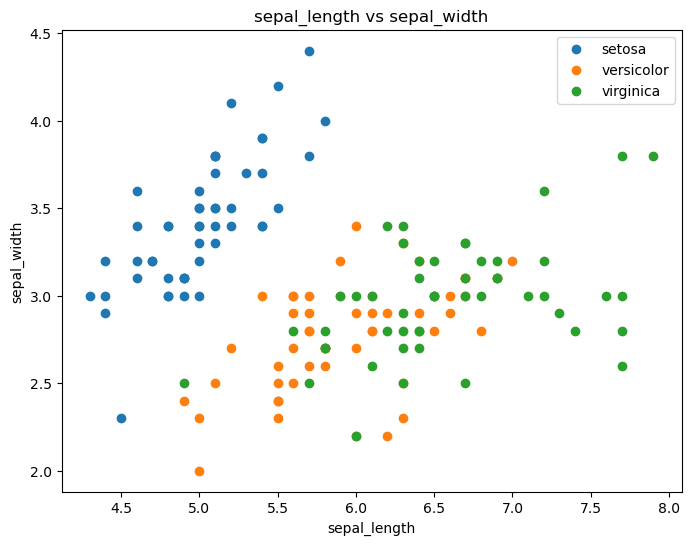

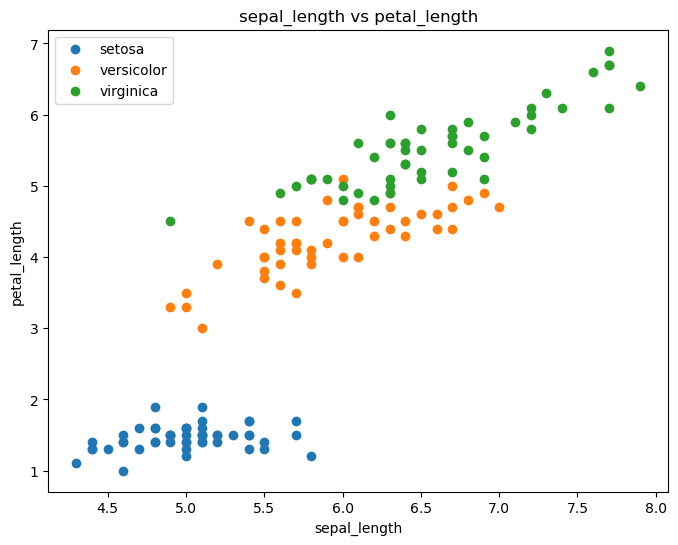

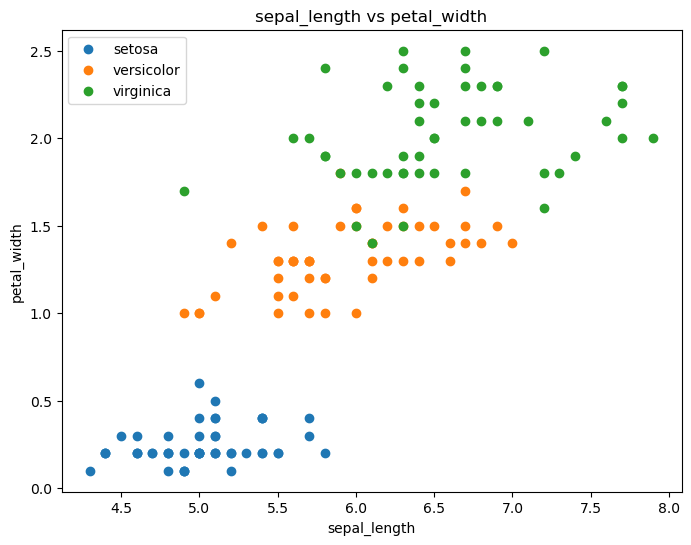

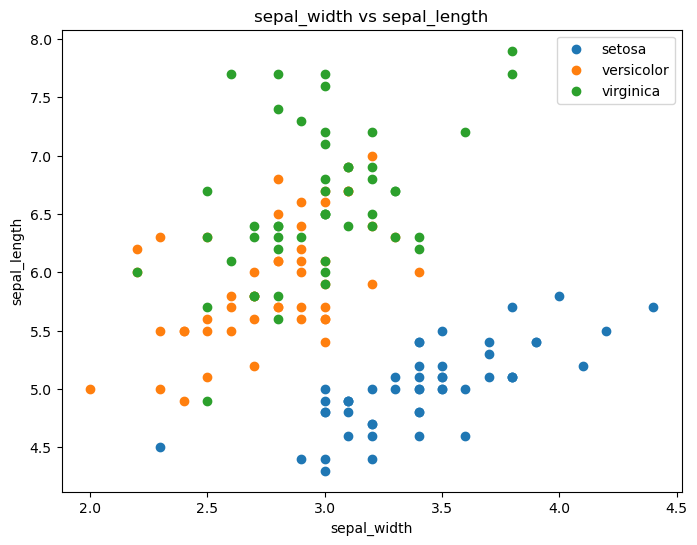

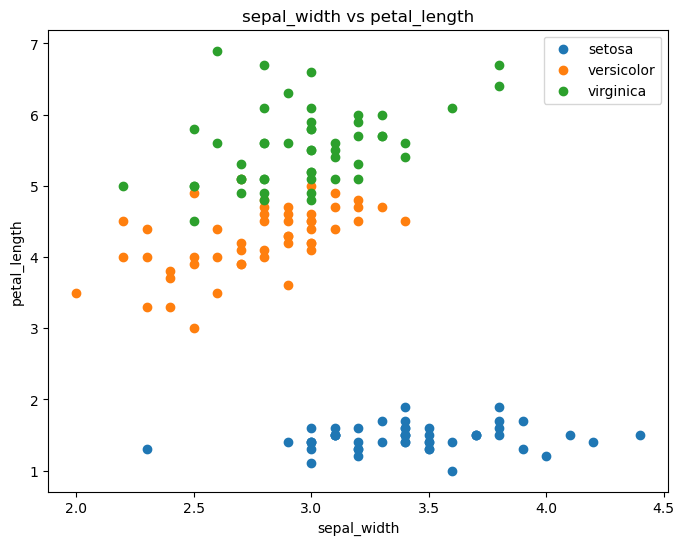

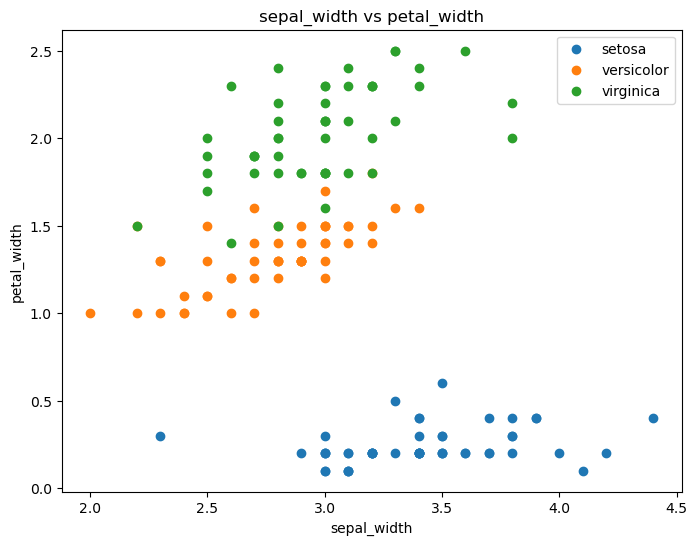

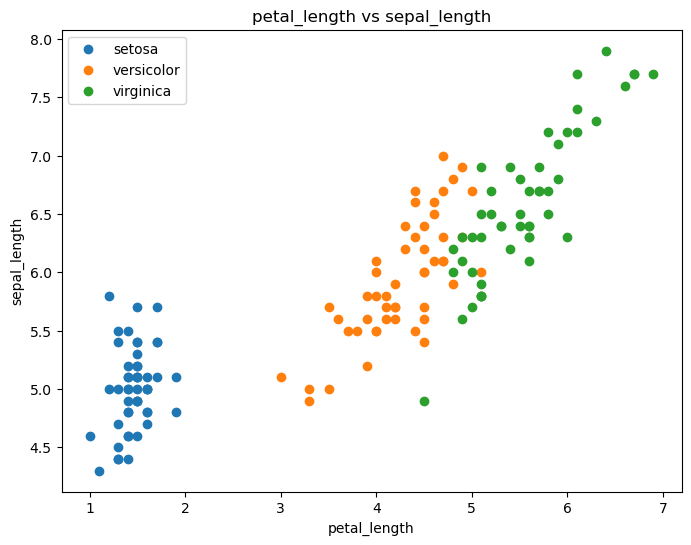

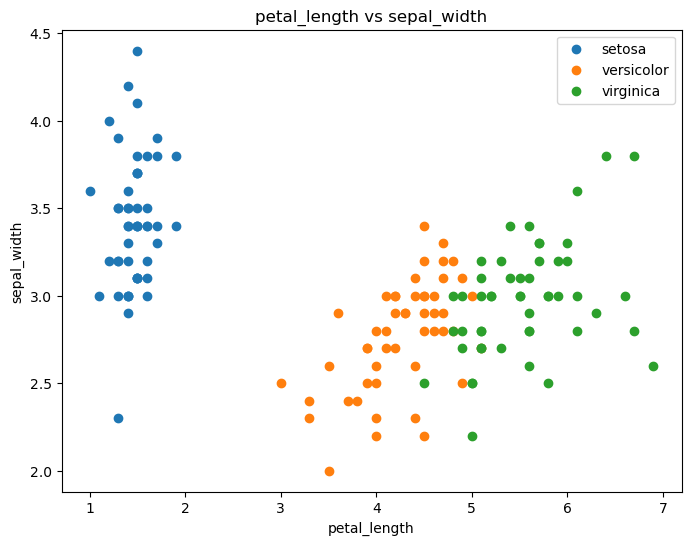

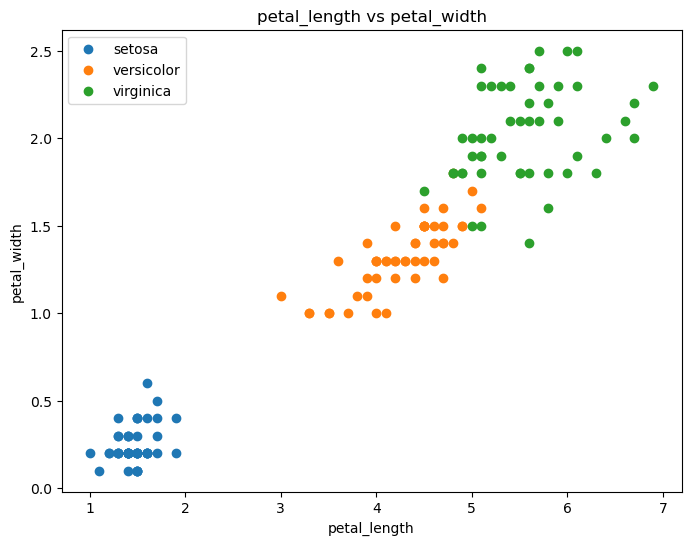

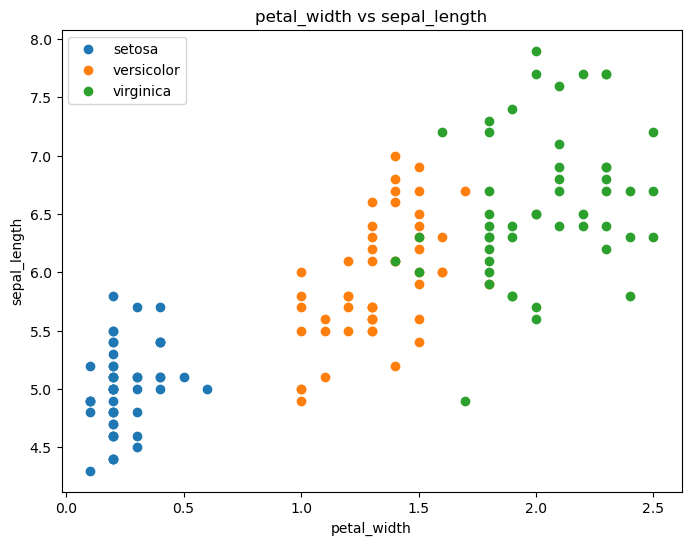

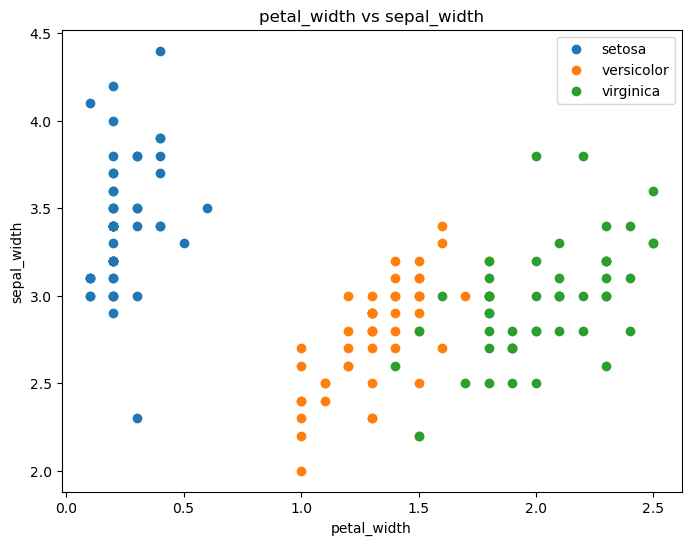

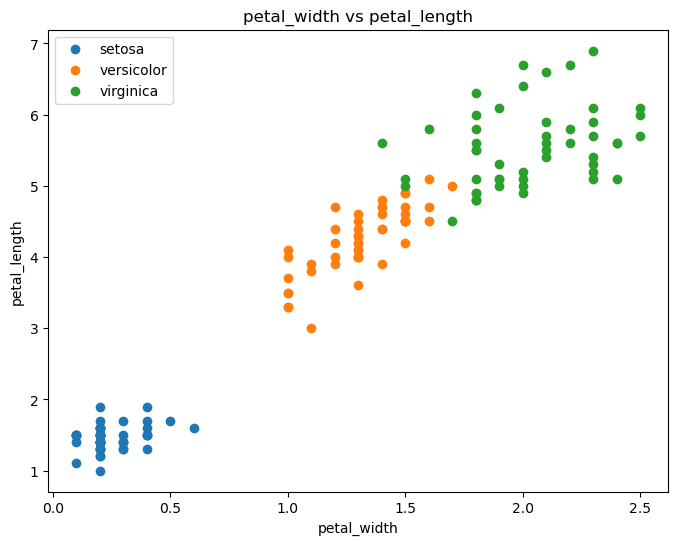

In [16]:
# Assuming 'df' is the DataFrame containing the Iris dataset

for feature1 in df.columns[:-1]:  # Exclude the last column (species)
    for feature2 in df.columns[:-1]:  # Exclude the last column (species)
        if feature1 != feature2:
            plt.figure(figsize=(8, 6))
            for class_label in df['species'].unique():
                class_data = df[df['species'] == class_label]
                plt.scatter(class_data[feature1], class_data[feature2], label=class_label)
            plt.xlabel(feature1)
            plt.ylabel(feature2)
            plt.title(f'{feature1} vs {feature2}')
            plt.legend()
            plt.show()


#### v)

A. Was there any class that had obvious outliers; if so how did you determine the outlier, if not, why not?


    Visually, outliers are identified based on their position in the plots such as overlapping and distance from the cluster of its feature. It provides a quick and intuitive way to spot potential outliers. Yet, there was no obvious outliers based on looking at different plots. Visual inspection is a quick way to find obvious outliers; yet it is not the best way to find outliers that are less obvious. In that case, they would have been identified based on their position in relation to the mean and standard deviation. For instace, data points that were more than 2 standard deviations away from the mean were considered outliers and removed. After calculation, if there were instances where the data points in a class were unusually far from the mean (in either the high or low direction), those data points would have been classified as outliers.


B. What was the metric used to determine the outlier? Explain why the metric was chosen.

    The metric used to determine outliers in my algorithm was based on the mean and standard deviation. Specifically, the range for identifying outliers was defined as:

    Lower bound: mean - 2 * std_dev
    Upper bound: mean + 2 * std_dev

    This method assumes that the data roughly follows a normal distribution. Outliers were identified as data points that fell outside this range.

    The choice of this metric (mean and standard deviation) is a common approach in outlier detection. It is based on the assumption that data close to the mean is more likely to be representative of the true underlying distribution. Values significantly far from the mean are flagged as potential outliers.

    However, it's important to note that this method relies on the assumption of normality, which may not always hold true for all datasets. In some cases, alternative methods like the interquartile range (IQR) or domain-specific knowledge may be more appropriate for identifying outliers.

### E

#### i)

Pseudocode for feature ranking:

    1. For each feature:
       a. Calculate a score that represents the importance or contribution of the feature in separating the classes
       b. Rank the features based on their scores.
       c. Return the ranked features.
    
    Method: rank_features

    Parameters:
        - df (DataFrame): The input DataFrame containing features and a class column.
        - class_column (string): The label of the class column.

    Steps:
        1. Initialize an empty dictionary feature_scores to store the scores of each feature.

        2. For each feature in the DataFrame:
            a. Calculate the mean for each class group.
            b. Calculate the overall mean for the feature.
            c. Calculate the between-class variance as the sum of squared differences between class means and 
            overall mean.
            d. Calculate the within-class variance as the sum of squared differences between feature values and 
            class means.
            e. Calculate the score for the feature as the ratio of between-class variance to the total variance.
            f. Store the score in the feature_scores dictionary with the feature name as the key.

        3. Rank the features based on their scores in descending order.

        4. Return the ranked features list.



ii)

The time taken by the algorithm increases linearly with the number of features (n) and linearly with the number of rows in the DataFrame (m). The sorting operation on the features contributes to the overall time complexity. The time complexity would be O(Total) = O(n * m) + O(n log n) and below is breakdown.

    Breakdown
    
    Method: rank_features

    Steps:
        1. Initialize an empty dictionary feature_scores to store the scores of each feature.
            - This is a constant time operation (O(1)).

        2. For each feature in the DataFrame:
            a. Calculate the mean for each class group.
               - This involves grouping the DataFrame by the class column, and then calculating the mean 
               for each group.
               - Time complexity: O(m), where m is the number of rows in the DataFrame.

            b. Calculate the overall mean for the feature.
               - This involves calculating the mean of the feature across all rows.
               - Time complexity: O(m).

            c. Calculate the between-class variance as the sum of squared differences between class means and 
            overall mean.
               - This involves performing arithmetic operations on the class means.
               - Time complexity: O(1).

            d. Calculate the within-class variance as the sum of squared differences between feature values and 
            class means.
               - This involves performing arithmetic operations on feature values.
               - Time complexity: O(m).

            e. Calculate the score for the feature as the ratio of between-class variance to the total variance.
               - This involves performing arithmetic operations.
               - Time complexity: O(1).

            f. Store the score in the feature_scores dictionary with the feature name as the key.
               - This is a constant time operation (O(1)).

        3. Rank the features based on their scores in descending order.
            - This involves sorting the features based on their scores.
            - Time complexity: O(n log n), where n is the number of features.

        4. Return the ranked features list.
            - This is a constant time operation (O(1)).

    O(Total) = O(m * n) + O(n log n)
    
    ANSWER: T(n) = O(m * n) + O(n log n)


iii)

In [17]:
import pandas as pd

class FeatureRanker:
    def rank_features(self, df, class_column):
        feature_scores = {}
        
        for feature in df.columns[:-1]:  # Exclude the last column (species)
            class_means = df.groupby(class_column)[feature].mean()
            overall_mean = df[feature].mean()
            between_class_variance = ((class_means - overall_mean) ** 2).sum()
            within_class_variance = ((df[feature] - df.groupby(class_column)[feature].transform('mean')) ** 2).sum()
            score = between_class_variance / (between_class_variance + within_class_variance)
            feature_scores[feature] = score
            
        ranked_features = sorted(feature_scores, key=feature_scores.get, reverse=True)
        return ranked_features


In [18]:
# Assuming 'df' is the DataFrame containing the Iris dataset

# Create an instance of FeatureRanker
ranker = FeatureRanker()

# Specify the class column (species)
class_column = 'species'

# Rank the features
ranked_features = ranker.rank_features(df, class_column)

# Print the ranked features
print("Ranked Features:")
for i, feature in enumerate(ranked_features, start=1):
    print(f"{i}. {feature}")


Ranked Features:
1. petal_length
2. petal_width
3. sepal_length
4. sepal_width


#### iv)

A. Was there any feature that could separate the data by plant species; if so why, if
    not why not?
    
    Yes, based on the ranked features, it appears that petal_length and petal_width are the most effective features for separating the plant species. They are ranked highest, which suggests that they exhibit the largest differences in means between classes compared to within classes. This indicates that these two features provide meaningful information for distinguishing between the different plant species.



B. If a feature could not separate the plant types; what conclusion can drawn from
    this feature? 
    
    In this case, sepal_length and sepal_width are ranked lower than petal_length and petal_width. This suggests that they may not be as effective in separating the plant species. While they still contribute some information, it's likely that their differences in means between classes are smaller compared to within classes, making them less discriminative features.

    
C. Can a metric be developed to complement the ranking method? Explain why or
    why not.
    
    Yes, a metric can be developed to complement the ranking method. One such metric could be the Information Gain or Mutual Information. These metrics quantify the amount of information provided by a feature about the class labels. If a feature has high information gain, it means it provides a lot of information about the class labels and can be considered a good discriminator.
    
    Additionally, techniques like Recursive Feature Elimination (RFE) or feature selection algorithms (e.g., SelectKBest) can be used to further validate the importance of features. These methods iteratively remove less informative features and evaluate the impact on model performance.



### F


#### i) PCA on the Entire Dataset

In [19]:
from sklearn.decomposition import PCA

# Assuming 'df' is the DataFrame containing the Iris dataset

# Separate features and target
# PCA is an unsupervised technique, meaning it doesn't require knowledge of the target variable
X = df.drop('species', axis=1)

# Apply PCA to the features of a dataset, reducing it to 2 dimensions
pca = PCA(n_components=2)  # reduces the dimensionality of the dataset to 2 dimensions
X_pca = pca.fit_transform(X) # applies PCA to the feature matrix X

# X_pca now contains the data transformed into the reduced dimensional space


#### ii) PCA for Each Species Separately

In [20]:
# Iterate over each species and apply PCA separately
for class_label in df['species'].unique():
    class_data = df[df['species'] == class_label].drop('species', axis=1)
    pca = PCA(n_components=2)  # You can choose the number of components based on your needs
    X_pca_class = pca.fit_transform(class_data)
    
    # X_pca_class now contains the data transformed into the reduced dimensional space for this class


#### Visualization
    It generates a scatter plot to visualize the results of PCA on the Iris dataset. 
    Each point on the plot represents a data point transformed into a 2-dimensional space, and the points are color-coded by species. 
    This visualization helps in understanding the distribution and separability of the data in the reduced space

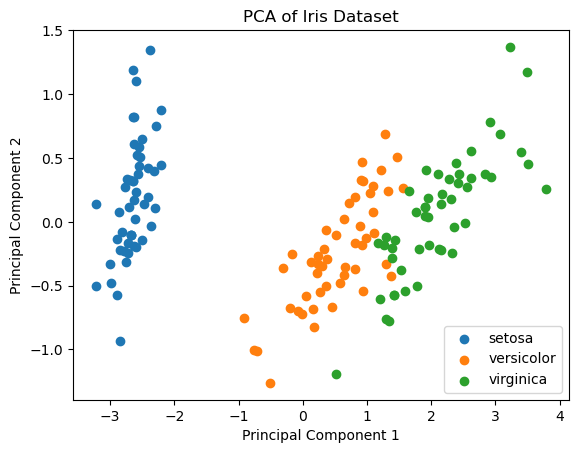

In [21]:
import matplotlib.pyplot as plt

# Assuming X_pca contains the transformed data after PCA

# Separate the transformed data by species
for class_label in df['species'].unique():
    X_pca_class = X_pca[df['species'] == class_label]
    
    # Scatter plot
    plt.scatter(X_pca_class[:, 0], X_pca_class[:, 1], label=class_label)

# Add labels and legend
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of Iris Dataset')
plt.legend()
plt.show()


#### iii)

A. What is the difference between using all the data and using the data by specie (class)?

    When using all the data, PCA is applied to the entire dataset as a whole, which means it considers all observations (flowers from all species) together to find the principal components. Thus, the resulting principal components are based on the combined information from all species. It finds the principal components that capture the broader patterns and most variances across all classes, providing an overview of the overall structure of the data.

    When using data by species (class), PCA is applied separately to each class. This allows you to examine the specific structure within each class. It may reveal more nuanced patterns and variances that are specific to individual classes.

B.

In [22]:
# Assuming 'pca' is the PCA object

explained_variance_ratio = pca.explained_variance_ratio_
print("Percentage of Variance Explained by Each Principal Component:")
for i, ratio in enumerate(explained_variance_ratio, start=1):
    print(f"Principal Component {i}: {ratio*100:.2f}%")


Percentage of Variance Explained by Each Principal Component:
Principal Component 1: 78.26%
Principal Component 2: 11.99%


Principal Component 1 explains approximately 78.26% of the total variance.
Principal Component 2 explains approximately 11.99% of the total variance.

This means that when we use these two principal components, we're retaining a total of about 90.25% of the original variability in the data. This is a significant reduction in dimensionality (from 4 features to 2), while still preserving a large portion of the information.

In practical terms, it suggests that the first principal component contains a lot of the important information about the data, while the second component captures a smaller but still significant portion. The remaining components (if there were more) would contribute even less to the overall variability.

The goal of PCA is to reduce dimensionality while preserving as much information as possible. The percentage of variance explained by each component helps us assess how effective our reduced-dimensional representation is compared to the original data.

C.

In [23]:
# Assuming 'pca' is the PCA object

cumulative_explained_variance = np.cumsum(pca.explained_variance_ratio_)
num_components_to_keep = np.argmax(cumulative_explained_variance >= 0.95) + 1

print(f"Number of Principal Components to Retain for 95% Variance: {num_components_to_keep}")


Number of Principal Components to Retain for 95% Variance: 1


The code calculates the number of principal components needed to retain at least 95% of the explained variance.

When the result for Part C is "Number of Principal Components to Retain for 95% Variance: 1", it means that I can retain approximately 95% of the total variance in the data by keeping only the first principal component.

This suggests that the first principal component contains a large portion of the important information in the data. By using just this one component, I am able to capture a substantial amount of the variability present in the original four-dimensional dataset.

In practical terms, it implies that one can effectively represent the data in a reduced-dimensional space with just one feature (principal component) while still preserving most of the information.